In [91]:
pip install us


Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [94]:
# math problems
import math 
# produce random numbers
import random
import json
from datetime import timedelta
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

In [95]:
cnf,dth,rec,act="#393e46","#ff2e63","#21b73","#fe9801"

In [96]:
full_data=pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv")

In [97]:
full_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [98]:
full_data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [99]:
full_grouped=pd.read_csv("/kaggle/input/corona-virus-report/full_grouped.csv")

In [100]:
full_grouped['Date']=pd.to_datetime(full_grouped['Date'])

In [101]:
 day_wise=pd.read_csv("/kaggle/input/corona-virus-report/day_wise.csv")
day_wise['Date']=pd.to_datetime(day_wise['Date'])
    

In [102]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [103]:
country_wise=pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
country_wise=country_wise.replace('',np.nan).fillna(0)

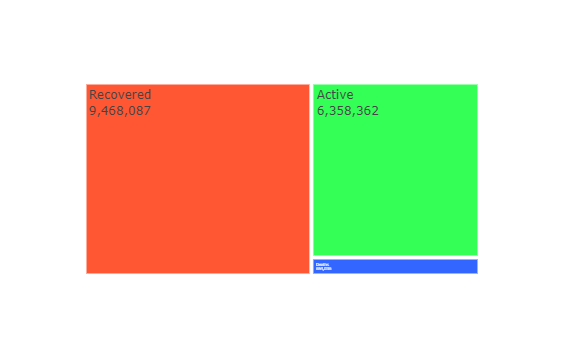

In [104]:
temp=day_wise[['Date','Deaths','Recovered','Active']].tail(1)
temp=temp.melt(id_vars="Date",value_vars=["Active","Deaths","Recovered"])

fig = px.treemap(temp, path=["variable"], values="value", height=225, color_discrete_sequence=color_discrete_sequence)
fig.data[0].textinfo='label+text+value'
fig.show()

In [105]:
def plot_map(df,col,pal):
    df=df[df[col]>0]
    fig=px.choropleth(df,locations="Country/Region",locationmode="country names",
                    color=col,hover_name="Country/Region",
                    title=col,hover_data=[col],color_continuous_scale=pal)
    fig.show()

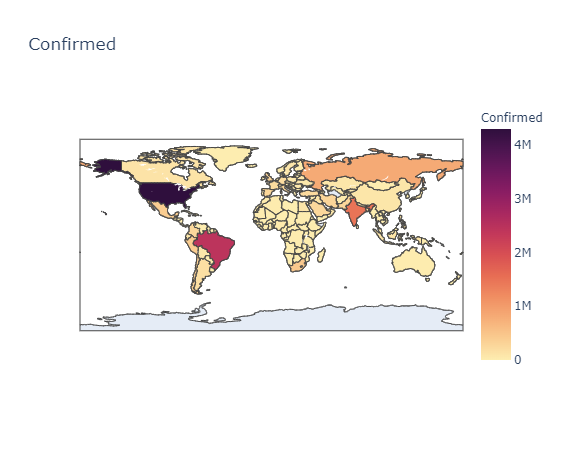

In [106]:
plot_map(country_wise,'Confirmed','matter')

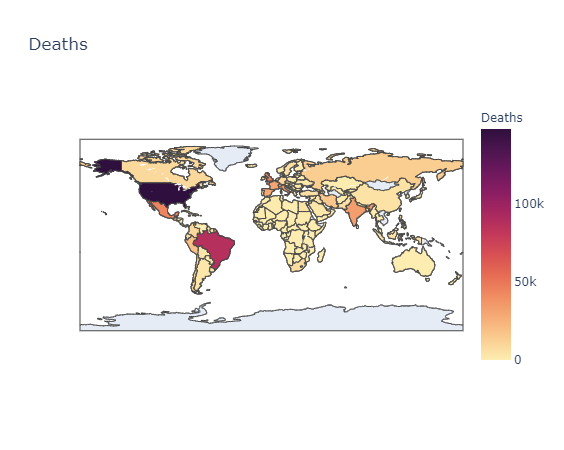

In [107]:
plot_map(country_wise,'Deaths','matter')

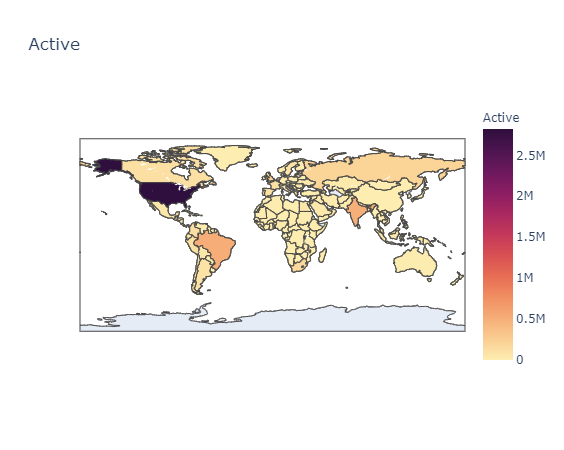

In [108]:
plot_map(country_wise,'Active','matter')

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



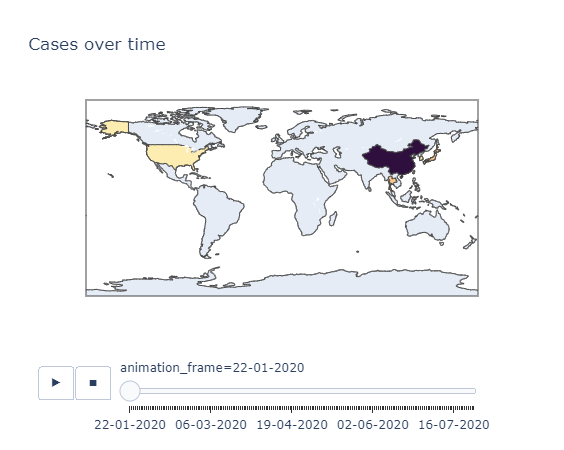

In [110]:
fig=px.choropleth(full_grouped,locations="Country/Region",
                 color=np.log(full_grouped["Confirmed"]),
                 locationmode='country names',hover_name="Country/Region",
                 animation_frame=full_grouped["Date"].dt.strftime('%d-%m-%Y'),
                                             title='Cases over time',color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [114]:
def plot_hbar(df,col,n,hover_data=[]):
    fig=px.bar(df.sort_values(col).tail(n),
              x=col,y="Country/Region",color='WHO Region',text=col,orientation='h',width=700,hover_data=hover_data,color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_layout(title=col,xaxis_title="",yaxis_title="",yaxis_categoryorder='total ascending',uniformtext_minsize=8,uniformtext_mode='hide')
    fig.show()

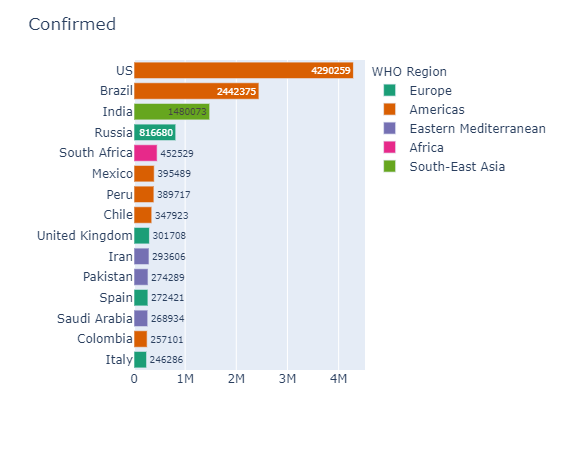

In [115]:
plot_hbar(country_wise,'Confirmed',15)